<a href="https://colab.research.google.com/github/rerebebeccacca/20210624-deep-learning-class/blob/main/01face_detection_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.3MB/s 


In [3]:
# Download and unzip dataset
!gdown --id 1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
!unzip -q "5celeb.zip"

Downloading...
From: https://drive.google.com/uc?id=1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
To: /content/5celeb.zip
2.73MB [00:00, 87.1MB/s]
replace __MACOSX/._5celeb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import mtcnn
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

In [5]:
path = './5celeb/data/*/*/*.jpg'

In [6]:
img_paths = glob(path)
len(glob(path))

118

In [7]:
# create the detector, using default weights
detector = MTCNN()

In [8]:
img = cv2.imread(img_paths[0])[:,:,::-1] # read image
# detect face
results = detector.detect_faces(img)
pprint(results)


[{'box': [113, 42, 39, 52],
  'confidence': 0.9918879866600037,
  'keypoints': {'left_eye': (126, 62),
                'mouth_left': (127, 83),
                'mouth_right': (141, 84),
                'nose': (135, 74),
                'right_eye': (144, 63)}}]


(113, 42) (152, 94) (264, 200, 3)


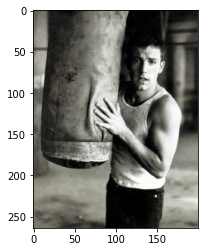

In [9]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
print((x1, y1), (x2, y2), img.shape)
plt.imshow(img)

113 152 42 94


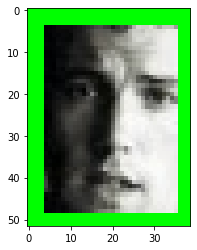

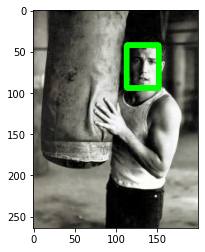

111 162 34 105


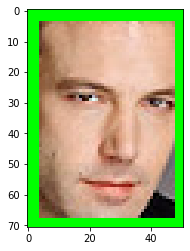

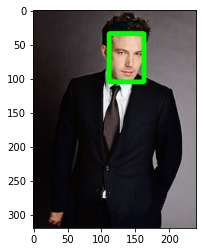

39 156 55 219


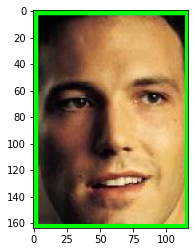

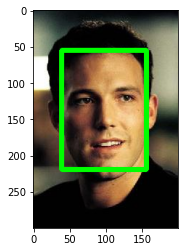

55 131 59 171


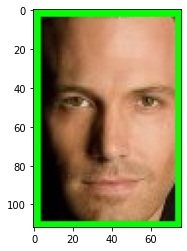

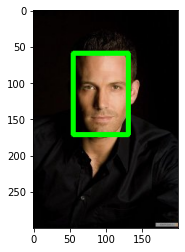

67 232 63 286


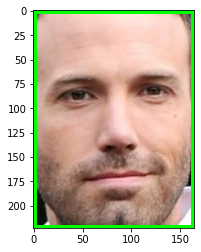

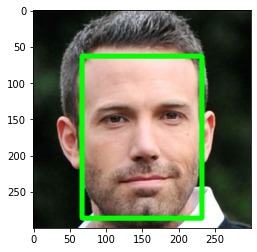

In [10]:
for path in img_paths[:5]:
    img = cv2.imread(path)[:,:,::-1] # read image
    # detect face
    results = detector.detect_faces(img)
    # extract the bounding box from the first face
    assert len(results) >= 1
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    print(x1, x2, y1,y2)
    # draw bbox
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5).get()
    # crop face
    patch = img[max(y1, 0):y2, max(x1, 0):x2]
    # show image
    plt.imshow(patch)
    plt.show()
    plt.imshow(img)
    plt.show()